In [36]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


LOGDIR = Path(
    '/home/michal/studia/machine_learning_lab/'
    'NEAT/neat_improved/logs/neat'
)

AC_LOGDIR = Path(
    '/home/michal/studia/machine_learning_lab/'
    'NEAT/neat_improved/logs9/actor_critic'
)


def load_neat_logs(logdir):
    paths = logdir.rglob('*population.csv')
    dfs = []
    for path in paths:
        df = pd.read_csv(path)
        df['time_in_s'] = pd.to_datetime(df['time_in_s'], unit='s')
        df = df.set_index(df['time_in_s'])
        df['env'] = path.parent.parent.stem
        df['start_time'] = path.parent.stem
        dfs.append(df)

    return pd.concat(dfs)


def load_ac_logs(logdir):
    paths = logdir.rglob('*actor_critic.csv')
    dfs = []
    for path in paths:
        df = pd.read_csv(path, names=['iteration', 'fitness', 'time_in_s'])
        df['time_in_s'] = pd.to_datetime(df['time_in_s'], unit='s')
        df = df.set_index(df['time_in_s'])
        df['env'] = path.parent.parent.stem
        df['start_time'] = path.parent.stem
        dfs.append(df)

    return pd.concat(dfs)


def plot_environment(group, label):
    group['time'] = group.groupby(pd.Grouper(freq='1s')).grouper.group_info[0]
    sns.lineplot(
        x='time',
        y='fitness',
        data=group,
        estimator='mean',
        label=label,
    )

In [37]:
df = load_neat_logs(LOGDIR)
max_fitness_df = df.loc[df.groupby(['env', 'iteration', 'start_time'])['fitness'].idxmax()]
neat_groups = max_fitness_df.groupby('env')
ac_groups = load_ac_logs(AC_LOGDIR).groupby(['env'])

<ipython-input-36-2a0ffde1078a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group.groupby(pd.Grouper(freq='1s')).grouper.group_info[0]
<ipython-input-36-2a0ffde1078a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group.groupby(pd.Grouper(freq='1s')).grouper.group_info[0]
<ipython-input-36-2a0ffde1078a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

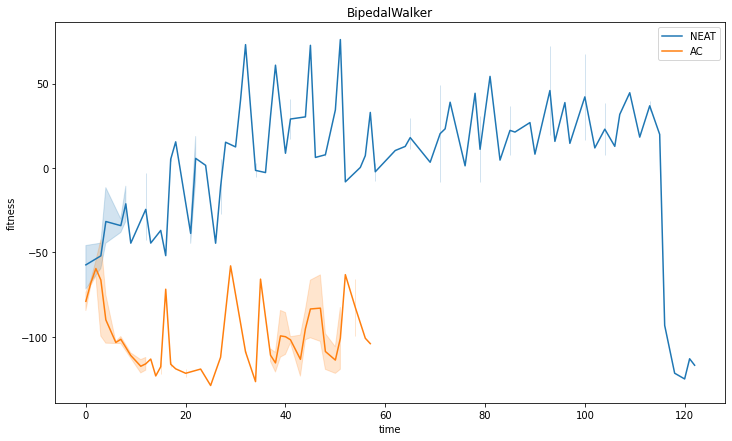

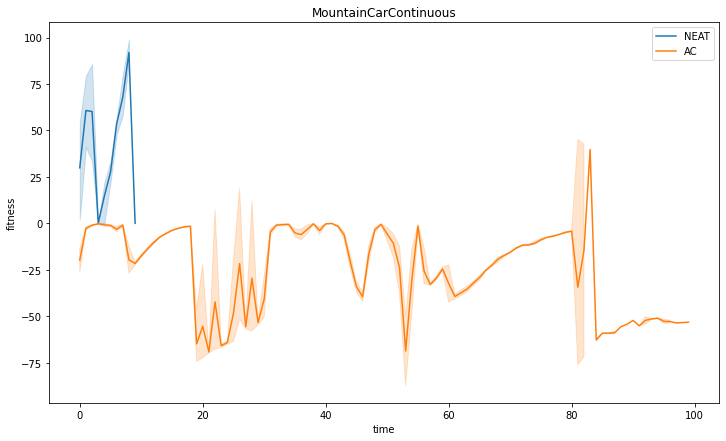

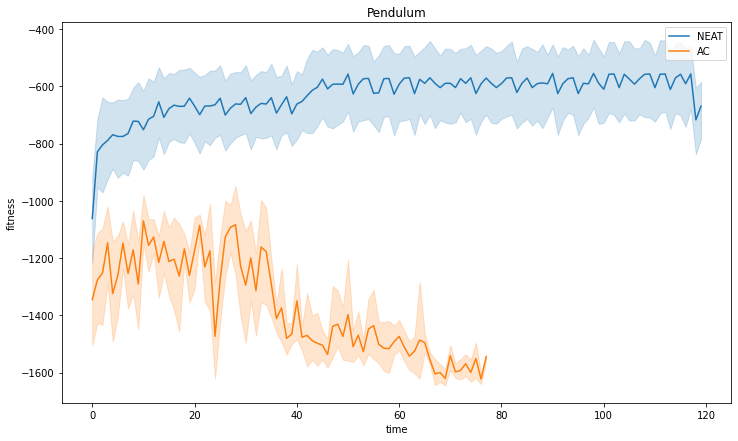

In [38]:
i = 0
for name, group1 in neat_groups:
    try:
        group2 = ac_groups.get_group(name)
    except KeyError:
        continue
    plt.figure(figsize=(12, 7))
    plt.title(name)
    plot_environment(group1, 'NEAT')
    plot_environment(group2, 'AC')
    i+=1
    plt.show()